## Activity: Date string manipulations

This notebook uses a file called `eda_manipulate_date_strings_with_python.csv`, which comes from the *bigquery-public-data.noaa_lightning.lightning_strikes* public data table. It contains cloud-to-ground lightning strike information collected by Vaisala's National Lightning Detection Network (NLDN) and aggregated into 0.1° tiles by the National Centers for Environmental Information. This means that all the daily strikes within 0.1° latitude x 0.1° longitude are summed and assigned to a set of geographic coordinates that represents the center of the 0.1° “square” area. 

One thing to keep in mind as you explore this data is that, because circles of latitude become shorter the farther they are from the equator, the area encompassed by the tiles becomes smaller the farther north the tiles are located. For example, tiles at 50°N are approximately 7 km x 11 km, while tiles at 20°N are approximately 10 km x 11 km—nearly 43% larger in area. 

Each row of the data used in this lesson represents a total lightning strike count on the specified date for a particular location. Refer to the column information in the table below. Note that some lessons in this course use subsets of the data. 

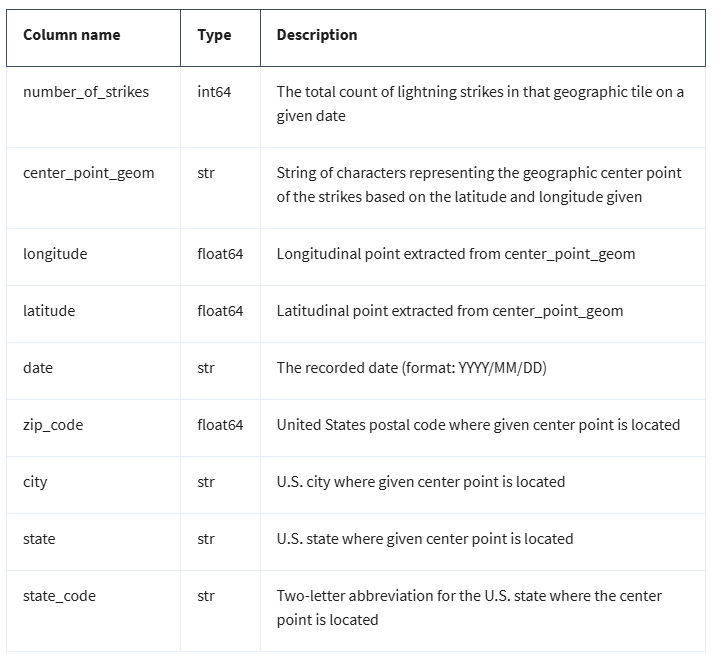

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./resources/eda_manipulate_date_strings_with_python.csv')
df.head(10)

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)
5,2016-08-05,16,POINT(-97.8 38.9)
6,2016-08-05,16,POINT(-81.9 36)
7,2016-08-05,16,POINT(-90.9 36.7)
8,2016-08-05,16,POINT(-106.6 26.1)
9,2016-08-05,16,POINT(-108 31.6)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
# create columns for grouping dates
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [10]:
 df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   week               object        
 4   month              object        
 5   quarter            object        
 6   year               object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 559.6+ MB


### Plot the number of weekly lightning strikes in 2018

In [28]:
# create new dataframe view of just 2018 data, summed by week
cols = ['number_of_strikes', 'week']
df_by_week_2018 = df[df['year'] == '2018'][cols].groupby(['week']).sum().reset_index()
df_by_week_2018.head(10)

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972
5,2018-W06,568417
6,2018-W07,60847
7,2018-W08,1347198
8,2018-W09,94082
9,2018-W10,196358


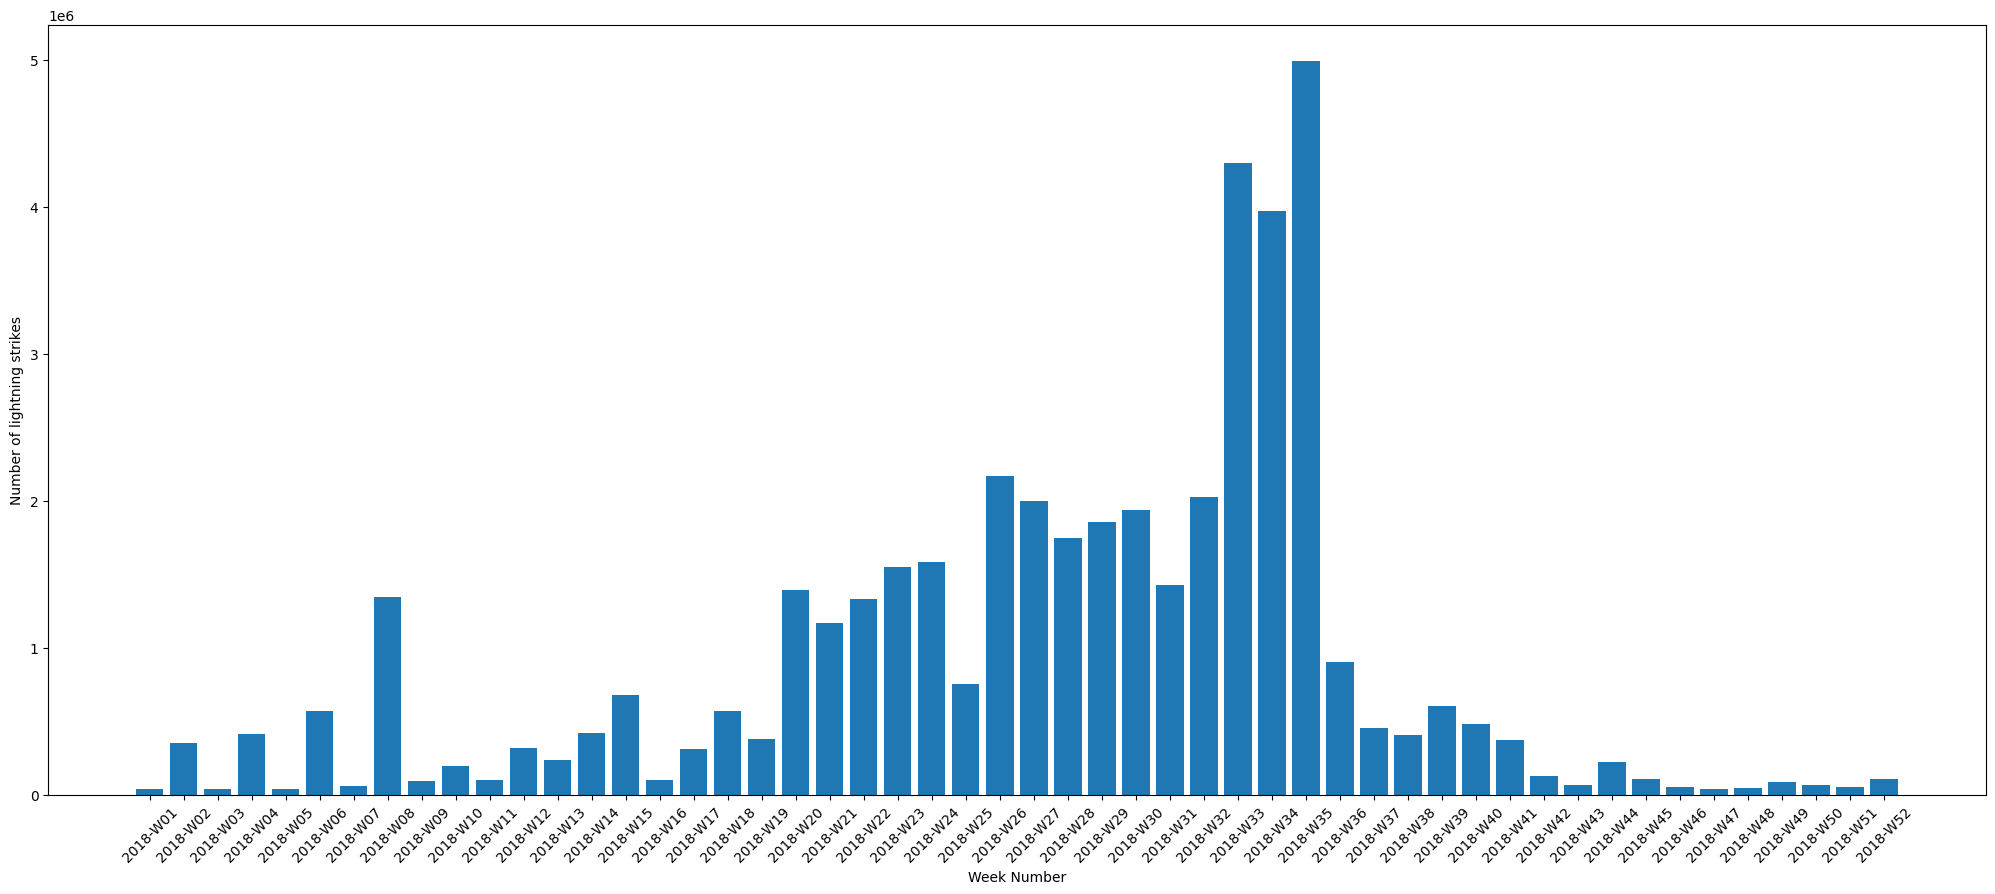

In [36]:
# plot a bar chart of weekly strikes totals in 2018
plt.figure(figsize=(25,10))
plt.bar(df_by_week_2018['week'], df_by_week_2018['number_of_strikes'])
plt.xlabel('Week Number')
plt.ylabel('Number of lightning strikes')

plt.xticks(rotation=45)
plt.show()

### Plot the number of quarterly lightning strikes from 2016-2018

In [42]:
# group 2016-2018 data by quarter and aggregating its sum
cols = ['quarter', 'number_of_strikes']
df_by_quarter = df[cols].groupby(['quarter']).sum().reset_index()

# format as text, in millions
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(10**6).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


In [43]:
# function to add labels to bar chart
def add_labels(x, y, labels):
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha='center', va='bottom')

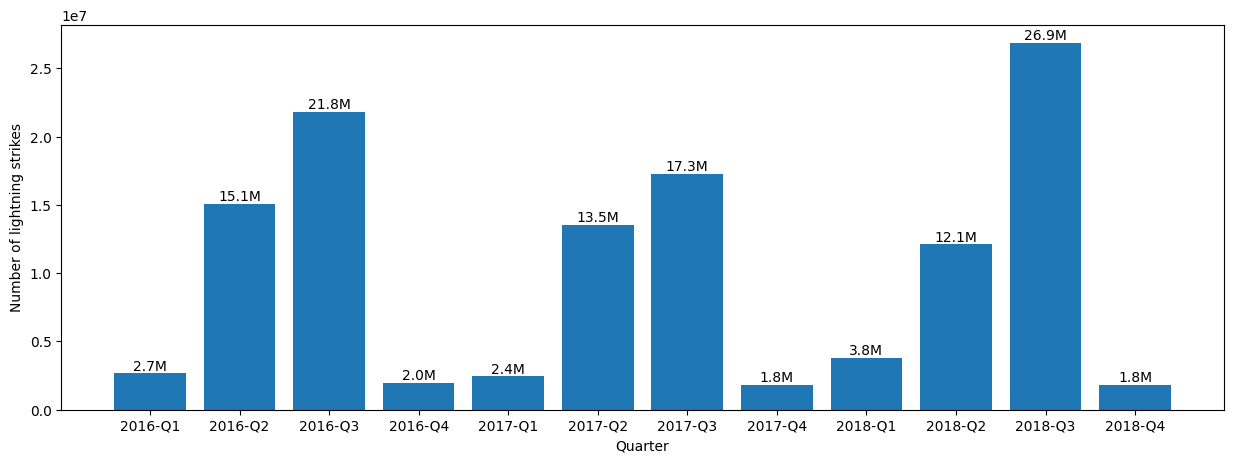

In [44]:
# plotting
plt.figure(figsize=(15,5))
plt.bar(df_by_quarter['quarter'],
        df_by_quarter['number_of_strikes'])

# formatting
add_labels(df_by_quarter['quarter'],
            df_by_quarter['number_of_strikes'],
            df_by_quarter['number_of_strikes_formatted'])
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.show()

#### Grouping Plots by Year

In [ ]:
# extract year and quarter
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


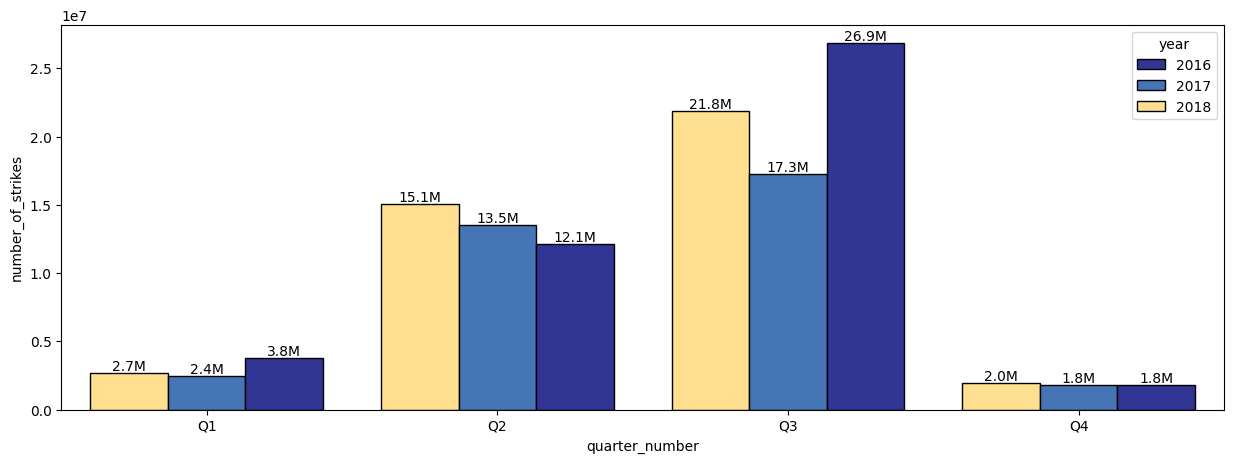

In [112]:
import numpy as np

plt.figure(figsize=(15,5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year',
    edgecolor = 'k',
    palette = 'Set3'
)

# formatting
colors = ["#fee090"] *4 + ["#4575b4"] *4 + ["#313695"] *4
for bar, color in zip(p.patches[:12], colors):
    p.annotate(
        str(round(bar.get_height()/10**6, 1)) + 'M',
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 1.2e6),
        ha='center', va='bottom',
        xytext = (0, -12),
        textcoords = 'offset points'
    )
    bar.set_facecolor(color)

for leg, color in zip(p.get_legend().legend_handles, np.unique(colors)):
    leg.set_facecolor(color)